# Определение закономерностей, влияющих на успешность компьютерных игр
---

## Описание проекта

Доступны открытые исторические данные до 2016 года о продажах компьютерных игр. Необходимо выявить закономерности, определяющие успешность игры, для планирования кампании на следующий год (2017-й).

---

## Описание данных
* <i>Name</i> — название игры;
* <i>Platform</i> — платформа;
* <i>Year_of_Release</i> — год выпуска;
* <i>Genre</i> — жанр игры;
* <i>NA_sales</i> — продажи в Северной Америке (миллионы долларов);
* <i>EU_sales</i> — продажи в Европе (миллионы долларов);
* <i>JP_sales</i> — продажи в Японии (миллионы долларов);
* <i>Other_sales</i> — продажи в других странах (миллионы долларов);
* <i>Critic_Score</i> — оценка критиков (максимум 100);
* <i>User_Score</i> — оценка пользователей (максимум 10);
* <i>Rating</i> — возрастной рейтинг ESRB.

---

## Шаг 1. Изучаем данные

In [1]:
import pandas as pd
#import math
import numpy as np
import matplotlib.pyplot as plt 
from scipy import stats as st

In [2]:
data_games = pd.read_csv('/datasets/games.csv')

In [3]:
#Сотрим структуру датасета и типы данных
data_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
#Смотрим сколько уникальных значеий в столбцах
data_games.nunique()

Name               11559
Platform              31
Year_of_Release       37
Genre                 12
NA_sales             402
EU_sales             307
JP_sales             244
Other_sales          155
Critic_Score          82
User_Score            96
Rating                 8
dtype: int64

In [5]:
#Смотрим жанры
data_games['Genre'].value_counts()

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: Genre, dtype: int64

In [6]:
#Смотрим года выпуска
data_games['Year_of_Release'].value_counts()

2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
2012.0     653
2015.0     606
2014.0     581
2013.0     544
2016.0     502
2001.0     482
1998.0     379
2000.0     350
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      62
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
Name: Year_of_Release, dtype: int64

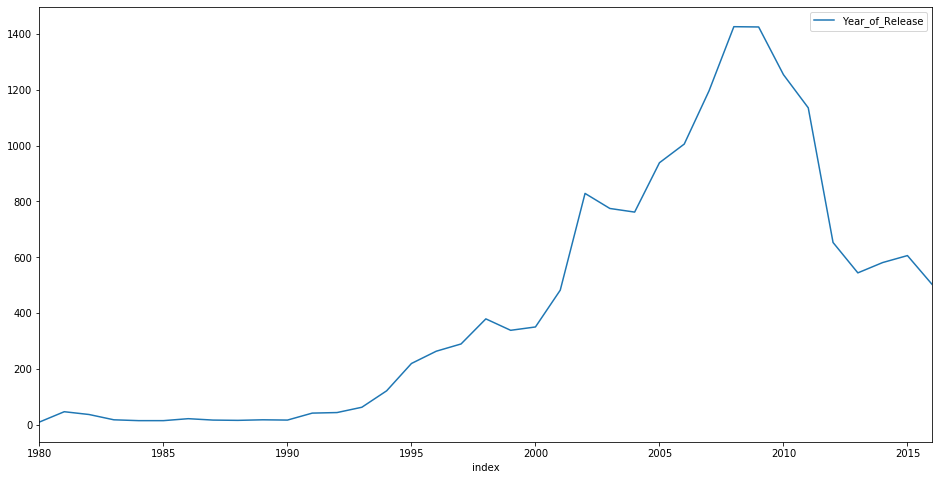

In [7]:
#смотрим распределение количества выпускаемых игр по годам
data_games['Year_of_Release'].value_counts().reset_index().sort_values(by='index',ascending = True).reset_index(drop=True).plot(x = 'index',y='Year_of_Release',figsize=(16,8))

In [8]:
#Смотрим платформы
data_games['Platform'].value_counts()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
PCFX       1
GG         1
Name: Platform, dtype: int64

In [9]:
#Смотрим ESRB-рейтинги
data_games['Rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: Rating, dtype: int64

In [10]:
#K-A - устаревший рейтинг, теперь вместо него E
#«RP» («Rating Pending») — «Рейтинг ожидается» - для демо-игр, присваивается до выхода официальных версий
data_games.query('Rating == "RP"')

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
13672,Clockwork Empires,PC,NaN,Strategy,0.0,0.04,0.0,0.00,58.0,3.8,RP
14270,Supreme Ruler: Cold War,PC,2011.0,Strategy,0.0,0.03,0.0,0.01,63.0,6.8,RP
16180,WRC: FIA World Rally Championship,PC,NaN,Racing,0.0,0.01,0.0,0.00,65.0,NaN,RP


In [11]:
#Смотрим игры
data_games['Name'].value_counts()

Need for Speed: Most Wanted    12
Ratatouille                     9
FIFA 14                         9
Madden NFL 07                   9
LEGO Marvel Super Heroes        9
                               ..
Hard Hitter Tennis              1
Pinobee: Wings of Adventure     1
DS Uranai Seikatsu              1
Sunset Overdrive                1
Falcon 4.0: Allied Force        1
Name: Name, Length: 11559, dtype: int64

In [12]:
#Смотрим оценки критиков
data_games['Critic_Score'].value_counts()

70.0    256
71.0    254
75.0    245
78.0    240
73.0    238
       ... 
20.0      3
17.0      1
22.0      1
13.0      1
21.0      1
Name: Critic_Score, Length: 82, dtype: int64

In [13]:
#Смотрим датасет
data_games.sort_values(by='Name',ascending = True)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
14983,Beyblade Burst,3DS,2016.0,Role-Playing,0.00,0.00,0.03,0.00,NaN,NaN,NaN
1079,Fire Emblem Fates,3DS,2015.0,Role-Playing,0.81,0.23,0.52,0.11,NaN,NaN,NaN
3358,Frozen: Olaf's Quest,3DS,2013.0,Platform,0.27,0.27,0.00,0.05,NaN,NaN,NaN
3862,Frozen: Olaf's Quest,DS,2013.0,Platform,0.21,0.26,0.00,0.04,NaN,NaN,NaN
13794,Haikyu!! Cross Team Match!,3DS,2016.0,Adventure,0.00,0.00,0.04,0.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
8280,uDraw Studio: Instant Artist,Wii,2011.0,Misc,0.06,0.09,0.00,0.02,NaN,tbd,E
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
9134,¡Shin Chan Flipa en colores!,DS,2007.0,Platform,0.00,0.00,0.14,0.00,NaN,NaN,NaN
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN


### Выводы по шагу 1
1. В датасете 16715 записей, данные по 11559 компьютерным играм с 1980 по 2016 включительно.
2. Есть пропуски в столбцах: название игры, год выпуска, жанр, оценка критиков, оценка пользователей, рейтинг ESRB.
3. В столбце пользовательской оценки есть записи "tbd" (To Be Determined) - отзывов слишком мало для формирования рейтинговой оценки.
4. В столбце рейтинга ESRB есть игры с рейтингом <i>K-A</i> (Kids to Adults) - присваивался играм до 1998 г., после был заменен на E (Everybody).
5. В столбце рейтинга ESRB есть игры с рейтингом <i>RP</i> - «Rating Pending» (Рейтинг ожидается). Обычно ставится демо-версиям игр.
---

## Шаг 2. Подготавливаем данные
* Заменим названия столбцов (приведем к нижнему регистру).
* Преобразуем данные в нужные типы.
* Обработаем пропуски при необходимости:
* Посчитаем суммарные продажи во всех регионах в отдельном столбце.

In [14]:
#Заменяем названия столбцов (приводим к нижнему регистру)
data_games.columns = ['name','platform','year_of_release','genre','na_sales','eu_sales','jp_sales','other_sales','critic_score','user_score','rating']

In [15]:
#Смотрим, сколько у нас пользовательских оценок, равных tbd
data_games.query('user_score == "tbd"')['user_score'].count()

2424

In [16]:
#Аббревиатура tbd в столбце с пользовательским рейтингом означает To Be Determined - отзывов слишком мало для формирования рейтинговой оценки
#В user_score tbd меняем на NaN
data_games.loc[data_games['user_score'] == 'tbd','user_score'] = np.nan

In [17]:
#ESRB-рейтинг K-A использовался для игр до 1998 года, после был заменен ассоциацией на E - поменяем и мы
#В столбце rating K-A меняем на E
data_games.loc[data_games['rating'] == 'K-A','rating'] = 'E'

In [18]:
#ESRB-рейтинг RP (Рейтинг ожидается) меняем на NaN
data_games.loc[data_games['rating'] == 'RP','rating'] = np.nan

In [19]:
#Преобразовываем user_score из типа object во float
data_games['user_score'] = data_games['user_score'].astype('float',errors='ignore')

In [20]:
#Преобразовываем critic_score из типа float в int
#data_games['critic_score'] = data_games['critic_score'].astype('Int64',errors='ignore')
#преобразовали бы да коэффициент корреляции потом не посчитать

In [21]:
##Cчитаем суммарные продажи во всех регионах, записываем в отдельный столбец
data_games['all_sales'] = data_games['na_sales'] + data_games['eu_sales'] + data_games['jp_sales'] + data_games['other_sales']

In [22]:
data_games.sort_values(by='all_sales',ascending = False).head(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31


In [23]:
#pd.set_option('display.max_rows', 500)
len(data_games.query('year_of_release != year_of_release')) # 269 записей с неизвестным годом выпуска

269

In [24]:
#Посмотрим какие игры с пропусками в годах выпуска обеспечили суммарные продажи > 1 млн
data_games.query('year_of_release != year_of_release').groupby('name')['all_sales'].sum().reset_index().sort_values(by="all_sales",ascending = False).query('all_sales >= 1')

,name,all_sales
149,Rock Band,7.30
106,Madden NFL 2004,5.24
95,LEGO Harry Potter: Years 5-7,4.66
94,LEGO Batman: The Videogame,4.34
56,FIFA Soccer 2004,3.50
231,wwe Smackdown vs. Raw 2006,3.00
169,Space Invaders,2.53
66,Frogger's Adventures: Temple of the Frog,2.40
96,LEGO Indiana Jones: The Original Adventures,2.33
23,Call of Duty 3,2.24


In [25]:
#Всего 20 - найдем для них в интернет года выпуска и заполним пропуски - хотелось бы их учитывать при расчетах
games= [
    ['Rock Band',2007],
    ['Madden NFL 2004',2003],
    ['LEGO Harry Potter: Years 5-7',2011],
    ['LEGO Batman: The Videogame',2008],
    ['FIFA Soccer 2004',2003],
    ['wwe Smackdown vs. Raw 2006',2005],
    ['Space Invaders',1999],
    ["Frogger's Adventures: Temple of the Frog",2001],
    ["LEGO Indiana Jones: The Original Adventures",2008],
    ["Call of Duty 3",2006],
    ["The Lord of the Rings: War in the North",2011],
    ["Call of Duty: Black Ops",2010],
    ["Test Drive Unlimited 2",2011],
    ["Triple Play 99",1998],
    ["Adventure",1980],
    ["Combat",1977],
    ["NASCAR Thunder 2003",2002],
    ["Hitman 2: Silent Assassin",2002],
    ["Legacy of Kain: Soul Reaver",1999],
    ["Donkey Kong Land III",1997]
]

games_col = ['name','year_of_release']

data_games_years = pd.DataFrame(data = games , columns = games_col)
data_games_years

,name,year_of_release
0,Rock Band,2007
1,Madden NFL 2004,2003
2,LEGO Harry Potter: Years 5-7,2011
3,LEGO Batman: The Videogame,2008
4,FIFA Soccer 2004,2003
5,wwe Smackdown vs. Raw 2006,2005
6,Space Invaders,1999
7,Frogger's Adventures: Temple of the Frog,2001
8,LEGO Indiana Jones: The Original Adventures,2008
9,Call of Duty 3,2006


In [26]:
#Добавим в основную таблицу
for i in range(len(data_games_years)):
    data_games.loc[data_games['name'] == data_games_years['name'][i], 'year_of_release'] = data_games_years['year_of_release'][i]

In [27]:
#Переведем year_of_release (год выпуска) из float в int
data_games['year_of_release'] = data_games['year_of_release'].astype('Int64',errors='ignore')

In [28]:
#Обрабатываем пропуски - удалим строки где название игры неизвестно (name = NaN)
data_games.dropna(subset = ['name'],inplace = True)

In [29]:
#Посмотрим, как пропуски в оценках и рейтинге распределены по годам
data_games.groupby('year_of_release')['critic_score','user_score','rating'].count()

,critic_score,user_score,rating
year_of_release,,,
1977,0,0,0
1980,0,0,0
1981,0,0,0
1982,0,0,0
1983,0,0,0
1984,0,0,0
1985,1,1,1
1986,0,0,0
1987,0,0,0


In [30]:
#Обрабатываем пропуски - удалим строки, где нет ни года выпуска, ни оценки критиков, ни оценки пользователей, ни рейтинга ESRB
#(year_of_release & critic_score & user_score & rating == NaN)
print(len(data_games.query('critic_score != critic_score & user_score != user_score & rating != rating & year_of_release != year_of_release')))
data_games.dropna(subset = ['year_of_release','critic_score','user_score','rating'],how = 'all',inplace = True)


79


In [31]:
data_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16634 entries, 0 to 16714
Data columns (total 12 columns):
name               16634 non-null object
platform           16634 non-null object
year_of_release    16477 non-null Int64
genre              16634 non-null object
na_sales           16634 non-null float64
eu_sales           16634 non-null float64
jp_sales           16634 non-null float64
other_sales        16634 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null float64
rating             9946 non-null object
all_sales          16634 non-null float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 1.7+ MB


In [32]:
#Ищем и удаляем дубликаты
if data_games.duplicated().sum()>0:
    data_games = data_games.drop_duplicates().reset_index(drop = True)
len(data_games)

16634

### Выводы по шагу 2
Были выполнены следующие манипуляции с данными:
* Переименовали столбцы:
    * Привели к нижнему регистру названия столбцов.
    

* Преобразовали данные в нужные типы:
    * Преобразовали столбец user_score (пользовательская оценка) из типа object во float.
    * Преобразовали столбец year_of_release (год выпуска) из float в int.
    

* Заменили неверные значения:
    * Заменили в столбце user_score (пользовательский рейтинг) аббревиатуру tbd (To Be Determined - отзывов слишком мало для формирования оценки) на NaN.
    * Заменили в столбце rating (ESRB-рейтинг) рейтинг K-A (использовался до 1998 г.) на актуальный E.
    * Заменили в столбце rating рейтинг RP (Rating Pending - «Рейтинг ожидается» - для демо-игр, присваивается до выхода официальных версий) на NaN.
    

* Обработали пропуски:
    * Заполнили пропуски в годе выпуска играм с суммарными продажами более 1 млн - указали год выпуска вручную по результатам поиска в интернете (20 игр).
    * Удалили записи с пропусками в столбце name (название игры) - 2 шт.
    * Удалили совсем безнадежные записи, где одновременно есть пропуски в следующих столбцах: year_of_release, critic_score, user_score, rating (79 шт.).


* Добавили столбцы:
    * Посчитали суммарные продажи во всех регионах и записали в отдельный столбец all_sales.

Возможные причины пропусков в оценках и рейтингах: пропуски идут до 1996 г. - скорее всего, до этого времени системы оценок просто не существовало (та же ESRB была основана лишь в 1994).

Можно было бы еще удалить следующие записи:
* с пропусками только в пользовательских оценках;
* с пропусками только в оценке критиков;
* с пропусками только в рейтинге ESRB;
* с пропусками в годе выпуска;
* с суммарными продажами менее 1 млн.;
* с низкими оценками пользователей;
* с низкими оценками критиков;
* с играми, выпущенными в малом количестве для редких платформ (SCD, WS, 3DO, TG16, PCFX, GG);
* с играми с редкими рейтингами (EC, AO);
* с играми, выпущенными более 20 лет назад.

Но хочется сохранить как можно больше данных для анализа.
 
Также можно было бы категоризировать:
* оценки пользователей
* оценки критиков
* суммарные продажи
* региональные продажи

А также объединить ряд редких платформ в одну группу.

Но поскольку для проекта это не требуется, оставим как есть.

---

## Шаг 3. Проводим исследовательский анализ данных
* Посмотрим, сколько игр выпускалось в разные годы. Определимся, важны ли данные за все периоды.
* Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. Определим характерный срок, за который появляются новые и исчезают старые платформы.
* Определим актуальный период и возьмем данные только по нему.
* Определим, какие платформы: лидируют по продажам, растут, падают. Выберем несколько потенциально прибыльных платформ.
* Построим график «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам. Оценим, велика ли разница в продажах. Оценим, велика ли разница в средних продажах на разных платформах. Опишем результат.
* Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния, посчитаем корреляцию между отзывами и продажами. Сформулируем выводы. Соотнесем выводы с продажами игр на других платформах.
* Посмотрим на общее распределение игр по жанрам. Определим самые прибыльные жанры. Определим, выделяются ли жанры с высокими и низкими продажами.

In [33]:
#Посмотрим, сколько игр выпускалось в разные годы - табличка
data_games.groupby('year_of_release')['name'].count().reset_index()

,year_of_release,name
0,1977,1
1,1980,10
2,1981,46
3,1982,36
4,1983,17
5,1984,14
6,1985,14
7,1986,21
8,1987,16
9,1988,15


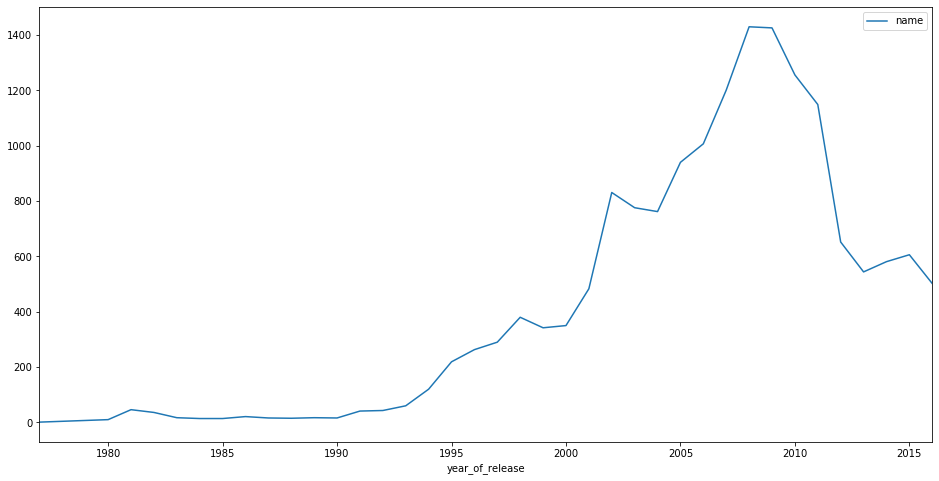

In [34]:
#Посмотрим, сколько игр выпускалось в разные годы - график
data_games.groupby('year_of_release')['name'].count().reset_index().plot(x='year_of_release',y='name',figsize=(16,8))
#Можно взять для анализа данные за последние 20 лет (1996-2015)

In [35]:
#Посмотрим, как менялись продажи по платформам - табличка
data_platform_allsales = data_games.groupby('platform')['all_sales'].sum().reset_index().sort_values(by='all_sales',ascending = False).reset_index(drop=True)
data_platform_allsales

,platform,all_sales
0,PS2,1254.44
1,X360,971.15
2,PS3,939.21
3,Wii,905.90
4,DS,805.58
5,PS,730.73
6,GBA,316.46
7,PS4,314.14
8,PSP,292.53
9,PC,259.52


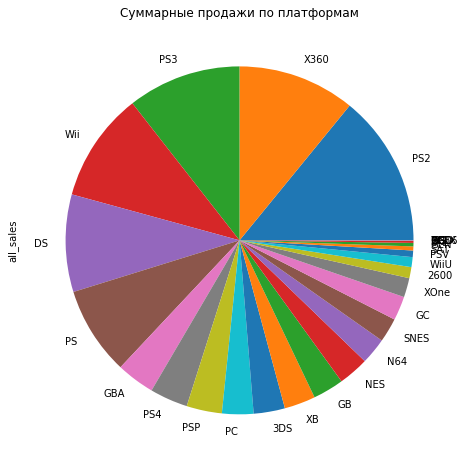

In [36]:
#Посмотрим, как менялись продажи по платформам - диаграмма
ax = data_platform_allsales['platform']
data_platform_allsales.plot(title='Суммарные продажи по платформам',kind='pie',y='all_sales',legend=False, labels = ax,figsize=(8, 8))

In [37]:
#Выберем платформы с наибольшими суммарными продажами 
platform_top = data_platform_allsales.loc[0:5,'platform']
platform_top

0     PS2
1    X360
2     PS3
3     Wii
4      DS
5      PS
Name: platform, dtype: object

In [38]:
#Построим распределение по годам 
data_platform_top = data_games.query('platform in @platform_top').pivot_table(index='year_of_release', columns='platform', values='all_sales', aggfunc=('sum'))
data_platform_top.columns = ['DS','PS','PS2','PS3','Wii','X360']
data_platform_top.reset_index()

,year_of_release,DS,PS,PS2,PS3,Wii,X360
0,1985,0.02,NaN,NaN,NaN,NaN,NaN
1,1994,NaN,6.03,NaN,NaN,NaN,NaN
2,1995,NaN,35.96,NaN,NaN,NaN,NaN
3,1996,NaN,94.70,NaN,NaN,NaN,NaN
4,1997,NaN,136.17,NaN,NaN,NaN,NaN
5,1998,NaN,170.95,NaN,NaN,NaN,NaN
6,1999,NaN,145.58,NaN,NaN,NaN,NaN
7,2000,NaN,96.37,39.17,NaN,NaN,NaN
8,2001,NaN,35.59,166.43,NaN,NaN,NaN
9,2002,NaN,6.67,206.60,NaN,NaN,NaN


In [39]:
#За какой характерный срок появляются новые и исчезают старые платформы?
print('Средний срок существования платформ:',int(data_platform_top.count().median()),'лет')

Средний срок существования платформ: 11 лет


In [40]:
#Возьмем период с 2005 по 2015 - 11 лет (средний срок существования платформы)
#(ранее не стоит брать - тех платформ уже нет, а 2016 еще не закончился, по нему неполные данные)

data_games_actual = data_games.query('year_of_release >= 2005 and year_of_release <= 2015').copy()

data_games_actual_platform = data_games_actual.pivot_table(index='year_of_release', columns='platform', values='all_sales', aggfunc=('sum'))
data_games_actual_platform

platform,3DS,DC,DS,GBA,GC,PC,PS2,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,
2005,NaN,NaN,130.14,33.86,27.62,4.37,163.66,NaN,NaN,43.84,NaN,NaN,NaN,8.25,49.08,NaN
2006,NaN,NaN,119.81,5.28,11.26,2.85,103.42,20.96,NaN,55.32,NaN,139.39,NaN,51.62,10.04,NaN
2007,NaN,0.02,146.94,3.40,0.27,9.28,77.11,74.81,NaN,46.93,NaN,154.86,NaN,97.88,0.55,NaN
2008,NaN,0.04,145.31,NaN,NaN,12.42,53.90,118.52,NaN,35.83,NaN,176.71,NaN,135.26,0.18,NaN
2009,NaN,NaN,119.54,NaN,NaN,16.91,26.40,130.93,NaN,37.78,NaN,206.97,NaN,120.29,NaN,NaN
2010,NaN,NaN,85.02,NaN,NaN,25.90,5.64,142.17,NaN,35.04,NaN,127.95,NaN,170.03,NaN,NaN
2011,63.60,NaN,26.84,NaN,NaN,35.44,0.45,159.14,NaN,18.08,4.80,60.88,NaN,146.33,NaN,NaN
2012,51.36,NaN,11.01,NaN,NaN,23.22,NaN,107.36,NaN,7.69,16.02,21.71,17.56,99.74,NaN,NaN
2013,56.57,NaN,1.54,NaN,NaN,12.38,NaN,113.25,25.99,3.14,10.59,8.59,21.65,88.58,NaN,18.96


In [41]:
data_games_actual.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10792 entries, 0 to 16711
Data columns (total 12 columns):
name               10792 non-null object
platform           10792 non-null object
year_of_release    10792 non-null Int64
genre              10792 non-null object
na_sales           10792 non-null float64
eu_sales           10792 non-null float64
jp_sales           10792 non-null float64
other_sales        10792 non-null float64
critic_score       5433 non-null float64
user_score         5295 non-null float64
rating             7050 non-null object
all_sales          10792 non-null float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 1.1+ MB


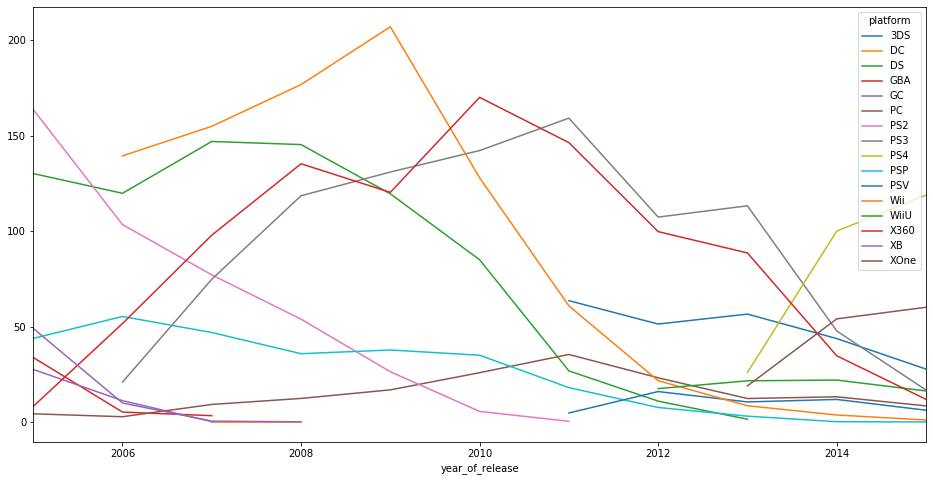

In [42]:
#Какие платформы лидируют по продажам, растут или падают? 
data_games_actual_platform.plot(figsize=(16,8))

In [43]:
#Выберем несколько потенциально прибыльных платформ
#Если судить по графику, потенциально прибыльных платформы две - PS4 и XOne
#Добавим их в список популярных платформ
platform_persp = pd.Series(['PS4','XOne'])
platform_top_persp=platform_top.append(platform_persp,ignore_index=True)
platform_top_persp

0     PS2
1    X360
2     PS3
3     Wii
4      DS
5      PS
6     PS4
7    XOne
dtype: object

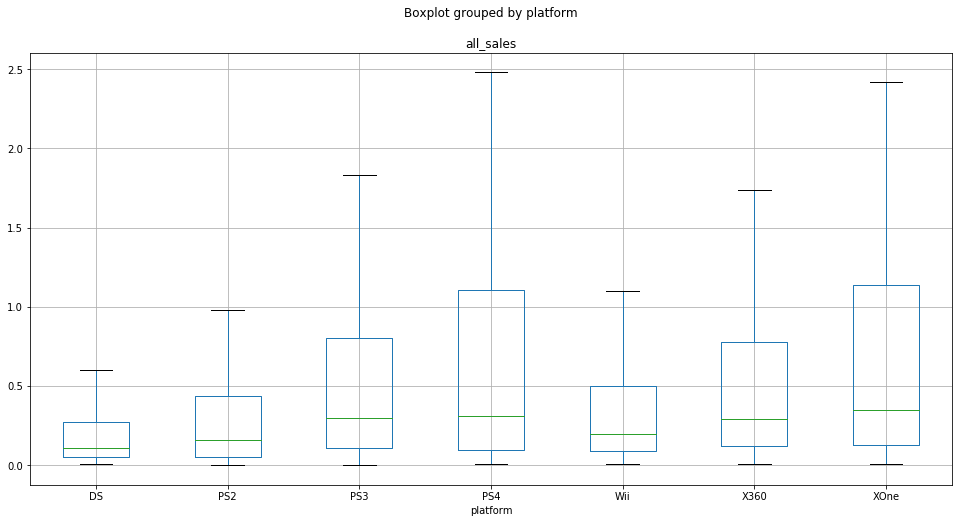

In [44]:
#Построим график «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам. 
data_games_actual.query('platform in @platform_top_persp').boxplot('all_sales', showfliers=False, by='platform',figsize=(16,8))

In [45]:
data_games_actual_platform = data_games_actual.query('platform in @platform_top_persp').pivot_table(index='name',columns='platform',values='all_sales')
data_games_actual_platform.describe()

platform,DS,PS2,PS3,PS4,Wii,X360,XOne
count,2098.000000,1067.000000,1271.000000,228.000000,1290.000000,1222.000000,160.000000
mean,0.374714,0.403543,0.732050,1.074079,0.699186,0.788277,0.832313
std,1.426699,0.711993,1.417214,1.899788,3.161654,1.637920,1.182243
min,0.010000,0.000000,0.000000,0.010000,0.010000,0.010000,0.010000
25%,0.050000,0.050000,0.110000,0.097500,0.090000,0.120000,0.130000
50%,0.110000,0.160000,0.300000,0.310000,0.195000,0.290000,0.350000
75%,0.270000,0.435000,0.800000,1.105000,0.500000,0.780000,1.137500
max,29.800000,5.950000,21.050000,14.630000,82.540000,21.820000,7.390000


In [46]:
#Cредние продажи на разных платформах 
data_games_actual_platform.mean()

platform
DS      0.374714
PS2     0.403543
PS3     0.732050
PS4     1.074079
Wii     0.699186
X360    0.788277
XOne    0.832313
dtype: float64

Коэффициент корреляции Пирсона для суммы продаж и отзывами пользователей для платформы X360 0.11204048047552412


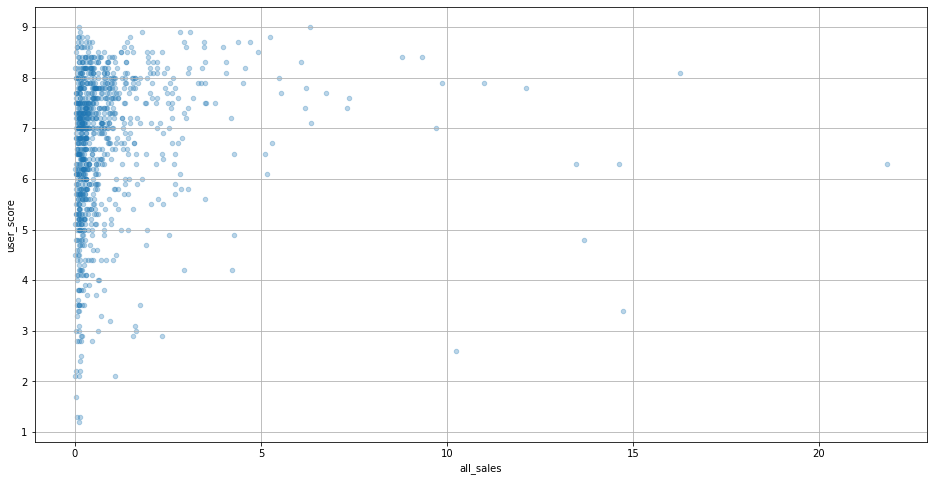

In [47]:
#Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей. 
#Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. 
#Строим диаграмму для отзывов пользователей и продаж
data_games_actual_x360 = data_games_actual.query('platform == "X360"')
data_games_actual_x360.plot(x='all_sales', y='user_score', kind='scatter',grid=True, alpha=0.3,figsize=(16,8))
print('Коэффициент корреляции Пирсона для суммы продаж и отзывами пользователей для платформы X360',data_games_actual_x360['all_sales'].corr(data_games_actual_x360['user_score']))

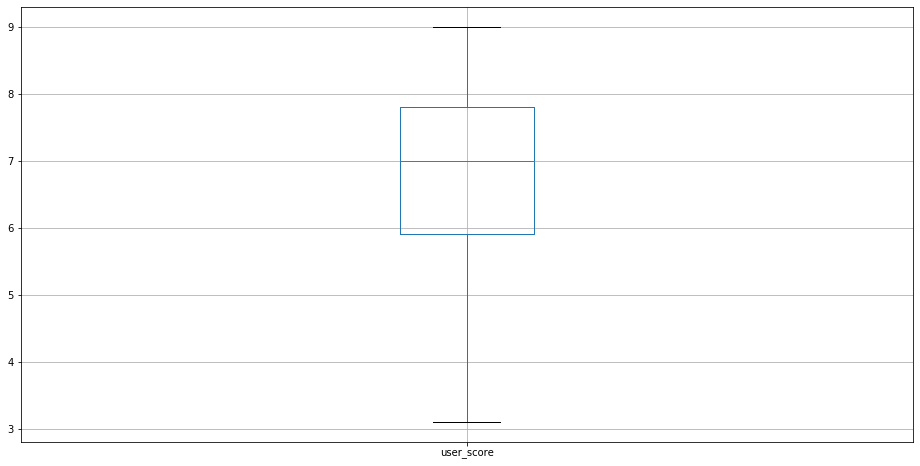

In [48]:
data_games_actual_x360.boxplot('user_score', showfliers=False, figsize=(16,8))

Коэффициент корреляции Пирсона для суммы продаж и отзывами критиков для платформы X360 0.39353091549805175


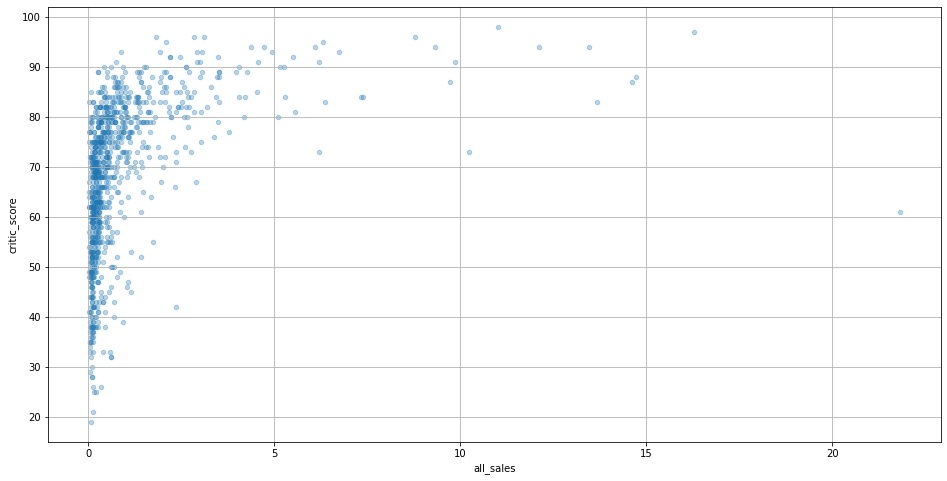

In [49]:
#Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы критиков. 
#Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. 
#Строим диаграмму для отзывов критиков и продаж
data_games_actual_x360.plot(x='all_sales', y='critic_score', kind='scatter',grid=True, alpha=0.3,figsize=(16,8))
print('Коэффициент корреляции Пирсона для суммы продаж и отзывами критиков для платформы X360',data_games_actual_x360['all_sales'].corr(data_games_actual_x360['critic_score']))

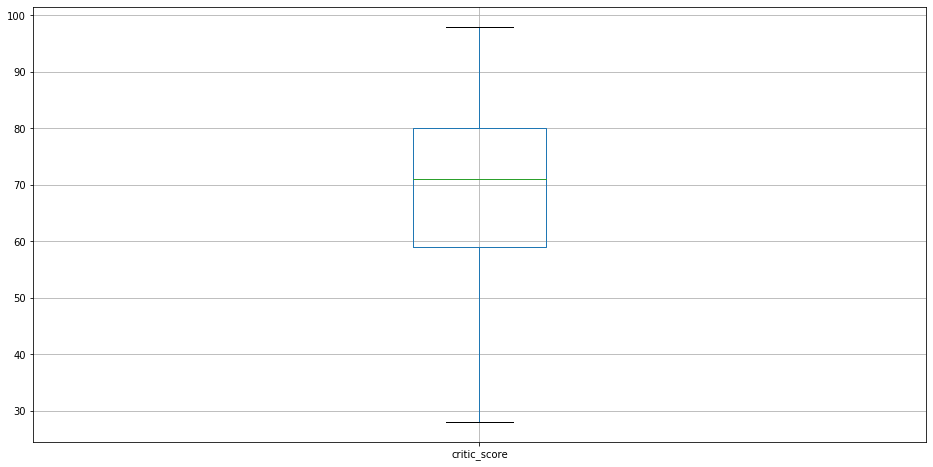

In [50]:
data_games_actual_x360.boxplot('critic_score', showfliers=False, figsize=(16,8))

In [51]:
data_games_actual_x360.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,all_sales
count,1223.000000,1223.000000,1223.000000,1223.000000,1223.000000,898.000000,942.00000,1223.000000
mean,2009.816026,0.489215,0.219836,0.010057,0.069673,68.711581,6.70276,0.788782
std,2.386474,1.048265,0.482063,0.024897,0.144734,15.081580,1.41878,1.637357
min,2005.000000,0.000000,0.000000,0.000000,0.000000,19.000000,1.20000,0.010000
25%,2008.000000,0.080000,0.010000,0.000000,0.010000,59.000000,5.90000,0.120000
50%,2010.000000,0.180000,0.050000,0.000000,0.020000,71.000000,7.00000,0.290000
75%,2011.000000,0.470000,0.225000,0.010000,0.070000,80.000000,7.80000,0.780000
max,2015.000000,15.000000,5.140000,0.240000,1.690000,98.000000,9.00000,21.820000


In [52]:
#Посмотреть на общее распределение игр по жанрам. 
#Что можно сказать о самых прибыльных жанрах? 
#Выделяются ли жанры с высокими и низкими продажами?
data_games_actual_genres = data_games_actual.pivot_table(index='genre', values='all_sales', aggfunc=('sum','count','mean','median'))
#Сортировка по самым прибыльным жанрам
data_games_actual_genres.sort_values(by='sum',ascending=False)

,count,mean,median,sum
genre,,,,
Action,2408,0.492072,0.18,1184.91
Sports,1335,0.621610,0.21,829.85
Shooter,788,0.919036,0.29,724.20
Misc,1340,0.463082,0.14,620.53
Role-Playing,1013,0.525765,0.15,532.60
Racing,617,0.573323,0.18,353.74
Platform,408,0.734877,0.20,299.83
Simulation,626,0.427684,0.14,267.73
Fighting,441,0.468481,0.17,206.60


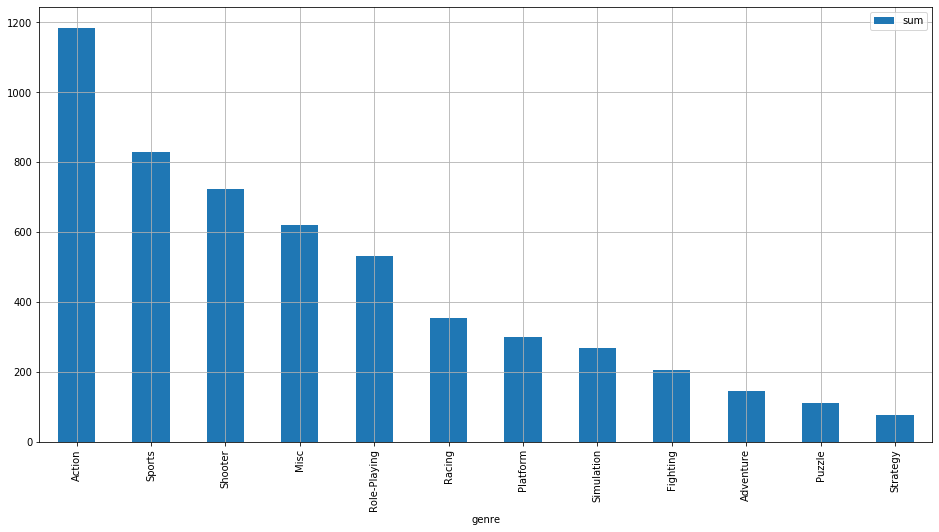

In [53]:
#график
data_games_actual_genres.sort_values(by='sum',ascending=False).plot(kind='bar', y='sum', grid=True, legend=True,figsize=(16,8))
#Самые прибыльные жанры: Action, Sports, Shooter, Misc, Role-Playing
#Самые отстающие - Puzzle и Strategy

In [54]:
#Сортировка по самым популярным жанрам (выпускаемым)
data_games_actual_genres.sort_values(by='count',ascending=False)

,count,mean,median,sum
genre,,,,
Action,2408,0.492072,0.18,1184.91
Misc,1340,0.463082,0.14,620.53
Sports,1335,0.621610,0.21,829.85
Role-Playing,1013,0.525765,0.15,532.60
Adventure,1009,0.144688,0.04,145.99
Shooter,788,0.919036,0.29,724.20
Simulation,626,0.427684,0.14,267.73
Racing,617,0.573323,0.18,353.74
Fighting,441,0.468481,0.17,206.60


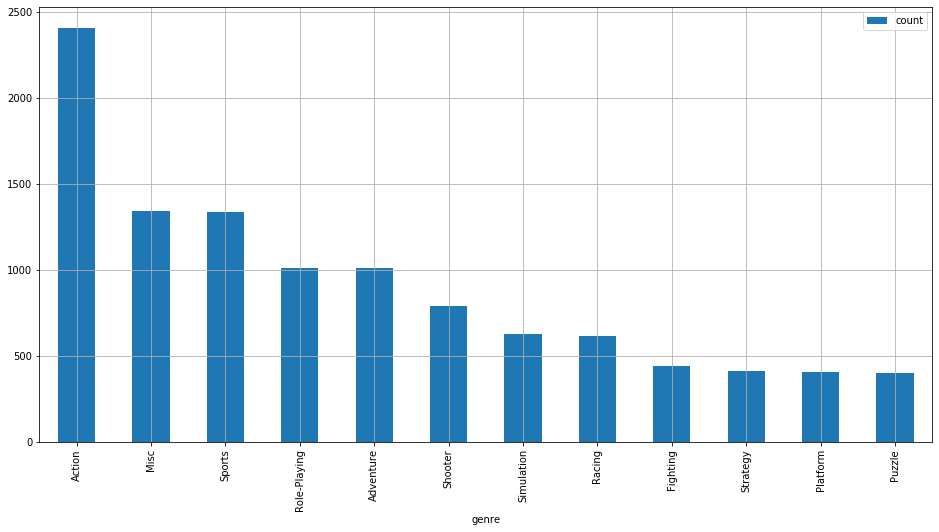

In [55]:
#график
data_games_actual_genres.sort_values(by='count',ascending=False).plot(kind='bar', y='count', grid=True, legend=True,figsize=(16,8))
#Самые популярные жанры: Action, Misc, Sports
#В непопулярных - Fighting, Strategy, Puzzle, Platform

In [56]:
#Сортировка по медианной сумме продаж игры
data_games_actual_genres.sort_values(by='median',ascending=False)

,count,mean,median,sum
genre,,,,
Shooter,788,0.919036,0.29,724.20
Sports,1335,0.621610,0.21,829.85
Platform,408,0.734877,0.20,299.83
Action,2408,0.492072,0.18,1184.91
Racing,617,0.573323,0.18,353.74
Fighting,441,0.468481,0.17,206.60
Role-Playing,1013,0.525765,0.15,532.60
Misc,1340,0.463082,0.14,620.53
Simulation,626,0.427684,0.14,267.73


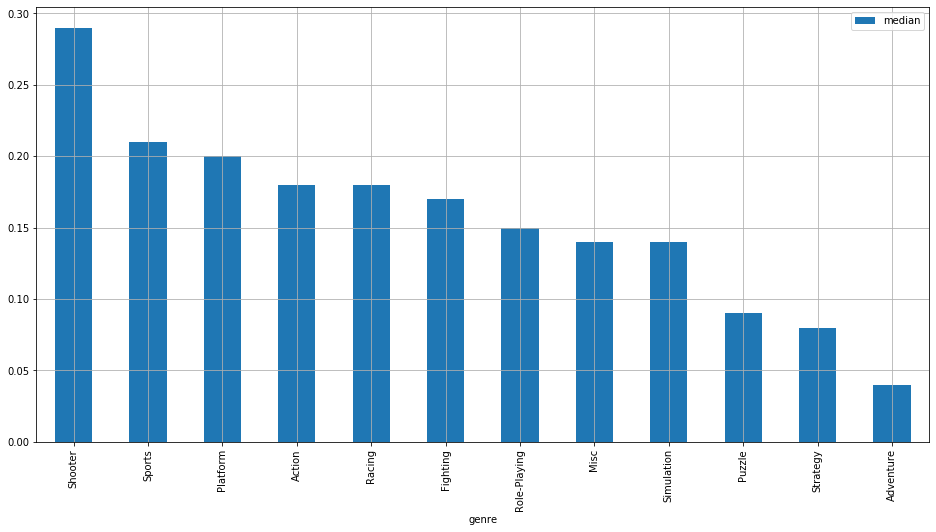

In [57]:
#график
data_games_actual_genres.sort_values(by='median',ascending=False).plot(kind='bar', y='median', grid=True, legend=True,figsize=(16,8))
#Игры в жанре Shooter дороже прочих

### Выводы по шагу 3

* Посмотрели, сколько игр выпускалось в разные годы. До 2008 года количество ежегодно выпускаемых игр увеличивалось по экспоненте, потом стало уменьшаться. Предварительно актуальный период для анализа был определен как 20 лет: с 1996 по 2015 гг. (2016 год не берем - мы по условиям проекта в декабре 2016, год еще не закончился, соответственно по нему нет полных данных).


* Посмотрели, как менялись продажи по платформам. Выбрали 6 платформ (PS2, X360, PS3, Wii, DS, PS) с наибольшими суммарными продажами, построили распределение по годам. Определили характерный срок, за который появляются новые и исчезают старые платформы - 11 лет. После этого сократили актуальный период для анализа данных до среднего времени жизни платформы - 11 лет - с 2005 по 2015 (2016 по-прежнему не берем). Выделили данные за этот период в отдельный датасет - data_games_actual.


* Построили график и посмотрели, как продажи игр на разных платформах распределены по годам. У популярных платформ, выбранных на предыдущем этапе, срок жизни подходит к концу, продажи падают. Но есть пара новых перспективных платформ, чьи продажи растут: PS4 и XOne. Добавили их к списку популярных платформ.


* Построили график «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам. У платформ-новичков, чьи продажи растут, более высокие медианные значения глобальных продаж, а размах шире, чем у популярных платформ, чьи продажи падают, и датасет сильнее скошен вверх. Соответственно - больше продаж на сумму выше медианных, больше потенциал роста продаж. Средние значения глобальных продаж также больше у перспективных платформ.  


* Посмотрели, как влияют на продажи внутри одной популярной платформы (X360) отзывы пользователей и критиков. Построили диаграммы рассеяния, посчитали корреляции между отзывами и продажами. Коэффициент корреляции Пирсона для суммы продаж и отзывов критиков маленький: 0.39, как и коэффициент корреляции Пирсона для суммы продаж и отзывов пользователей: 0.11. Т.е. оценки критиков и оценки пользователей слабо влияют на продажи. Хотя если судить по диаграммам, у игр с оценкой выше среднего (критиков - выше 69, пользователей - выше 6.7) больше шансов на успех.

* Посмотрели на общее распределение игр по жанрам. Самые прибыльные жанры по сумме глобальных продаж: Action, Sports, Shooter. Жанр Action также лидирует по количеству выпускаемых игр. Меньше всего денег принесли их создателям игры в жанрах Puzzle и Strategy. Возможно, связано с тем, что в данных жанрах выпускается мало игр (Puzzle в аутсайдерах) и они дешевые. Если судить по медианным значениям глобальных продаж, здесь лидируют игры жанра Shooter, а Puzzle - снова в тройке отстающих.

---

## Шаг 4. Составляем портрет пользователя каждого региона
Определим для пользователя каждого региона (NA - Северная Америка, EU - Европа, JP - Япония):
* Самые популярные платформы (топ-5).
* Самые популярные жанры (топ-5).
* Влияние рейтинга ESRB на региональные продажи

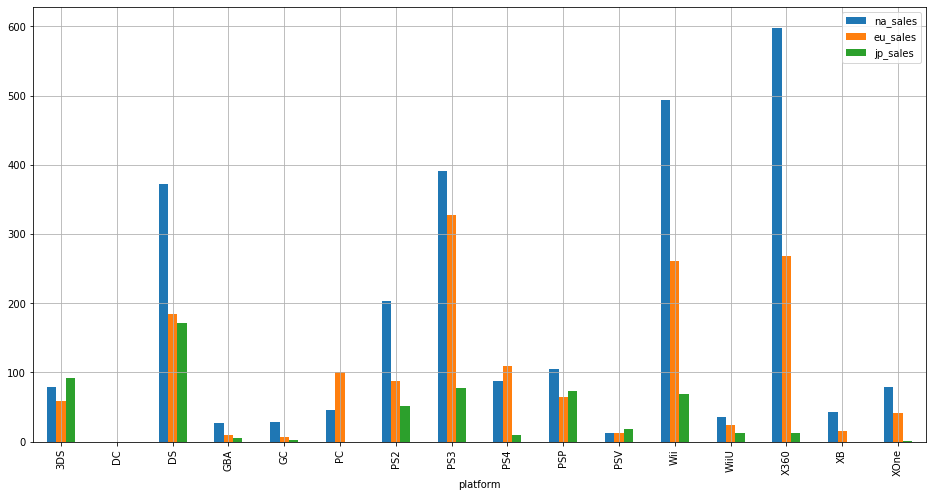

In [58]:
#Самые популярные платформы (топ-5) в каждом регионе (NA, EU, JP)
data_games_actual_platform_region_sales = data_games_actual.groupby('platform')['na_sales','eu_sales','jp_sales'].sum()
#график
data_games_actual_platform_region_sales.plot(kind='bar',grid=True, legend=True,figsize=(16,8))


In [59]:
#самые популярные платформы в NA
data_games_actual_platform_region_sales.loc[:,'na_sales'].reset_index().sort_values(by='na_sales',ascending=False).reset_index(drop=True).head()

,platform,na_sales
0,X360,598.31
1,Wii,493.31
2,PS3,391.22
3,DS,372.32
4,PS2,202.77


In [60]:
#самые популярные платформы в EU
data_games_actual_platform_region_sales.loc[:,'eu_sales'].reset_index().sort_values(by='eu_sales',ascending=False).reset_index(drop=True).head()

,platform,eu_sales
0,PS3,327.53
1,X360,268.86
2,Wii,261.61
3,DS,184.73
4,PS4,109.31


In [61]:
#самые популярные платформы в JP
data_games_actual_platform_region_sales.loc[:,'jp_sales'].reset_index().sort_values(by='jp_sales',ascending=False).reset_index(drop=True).head()

,platform,jp_sales
0,DS,171.35
1,3DS,92.59
2,PS3,78.13
3,PSP,73.85
4,Wii,68.28


In [62]:
#Описать различия в долях продаж

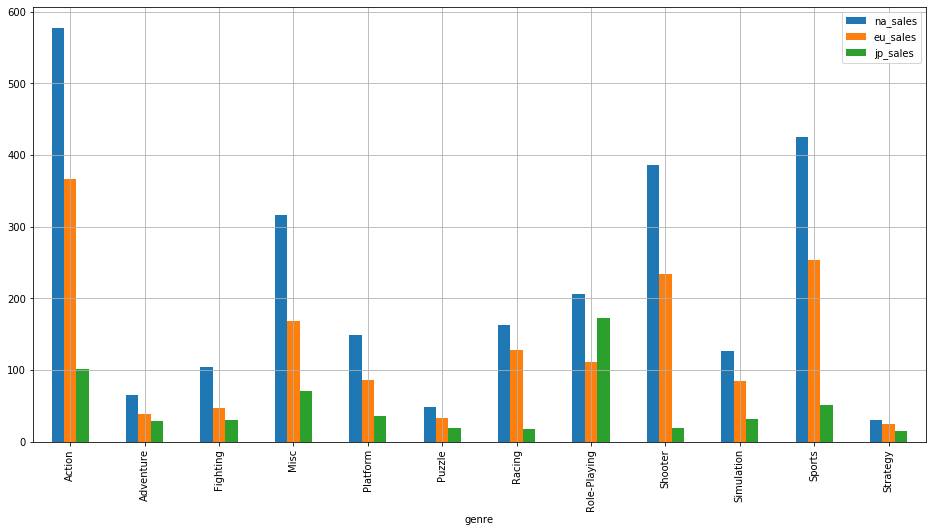

In [63]:
#Самые популярные жанры (топ-5) в каждом регионе (NA, EU, JP)
data_games_actual_genre_region_sales = data_games_actual.groupby('genre')['na_sales','eu_sales','jp_sales'].sum()
#график
data_games_actual_genre_region_sales.plot(kind='bar',grid=True, legend=True,figsize=(16,8))

In [64]:
#самые популярные жанры в NA
data_games_actual_genre_region_sales.loc[:,'na_sales'].reset_index().sort_values(by='na_sales',ascending=False).reset_index(drop=True).head()

,genre,na_sales
0,Action,577.63
1,Sports,425.16
2,Shooter,386.47
3,Misc,316.02
4,Role-Playing,205.96


In [65]:
#самые популярные жанры в EU
data_games_actual_genre_region_sales.loc[:,'eu_sales'].reset_index().sort_values(by='eu_sales',ascending=False).reset_index(drop=True).head()

,genre,eu_sales
0,Action,366.46
1,Sports,253.60
2,Shooter,233.82
3,Misc,167.79
4,Racing,128.04


In [66]:
#самые популярные жанры в JP
data_games_actual_genre_region_sales.loc[:,'jp_sales'].reset_index().sort_values(by='jp_sales',ascending=False).reset_index(drop=True).head()

,genre,jp_sales
0,Role-Playing,172.99
1,Action,101.33
2,Misc,71.45
3,Sports,51.59
4,Platform,36.21


In [67]:
#Определяем влияние рейтинга ESRB на продажи в отдельном регионе (NA, EU, JP)
#Посмотрим какие категории рейтинга остались в актуальном периоде
data_games_actual['rating'].value_counts()
#E: с 6 и старше
#T: с 13 и старше
#E10+: с 10 и старше 
#M: с 17 и старше 
#EC: с 3 и тсарше
#AO: с 18 и старше

E       2607
T       1935
E10+    1339
M       1160
EC         8
AO         1
Name: rating, dtype: int64

In [68]:
#Переводим рейтинг в цифры
#E: 6
#T: 13
#E10+: 10
#M: 17
#EC: 3
#AO: 18
data_games_actual.loc[data_games_actual['rating'] == 'EC', 'rating_num'] = 3
data_games_actual.loc[data_games_actual['rating'] == 'E', 'rating_num'] = 6
data_games_actual.loc[data_games_actual['rating'] == 'E10+', 'rating_num'] = 10
data_games_actual.loc[data_games_actual['rating'] == 'T', 'rating_num'] = 13
data_games_actual.loc[data_games_actual['rating'] == 'M', 'rating_num'] = 17
data_games_actual.loc[data_games_actual['rating'] == 'AO', 'rating_num'] = 18
data_games_actual['rating_num'].unique() 

array([ 6., nan, 17., 13., 10., 18.,  3.])

In [69]:
data_games_actual.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10792 entries, 0 to 16711
Data columns (total 13 columns):
name               10792 non-null object
platform           10792 non-null object
year_of_release    10792 non-null Int64
genre              10792 non-null object
na_sales           10792 non-null float64
eu_sales           10792 non-null float64
jp_sales           10792 non-null float64
other_sales        10792 non-null float64
critic_score       5433 non-null float64
user_score         5295 non-null float64
rating             7050 non-null object
all_sales          10792 non-null float64
rating_num         7050 non-null float64
dtypes: Int64(1), float64(8), object(4)
memory usage: 1.5+ MB


Коэффициент корреляции Пирсона для продаж в NA и ESRB-рейтингом 0.03925109873815757


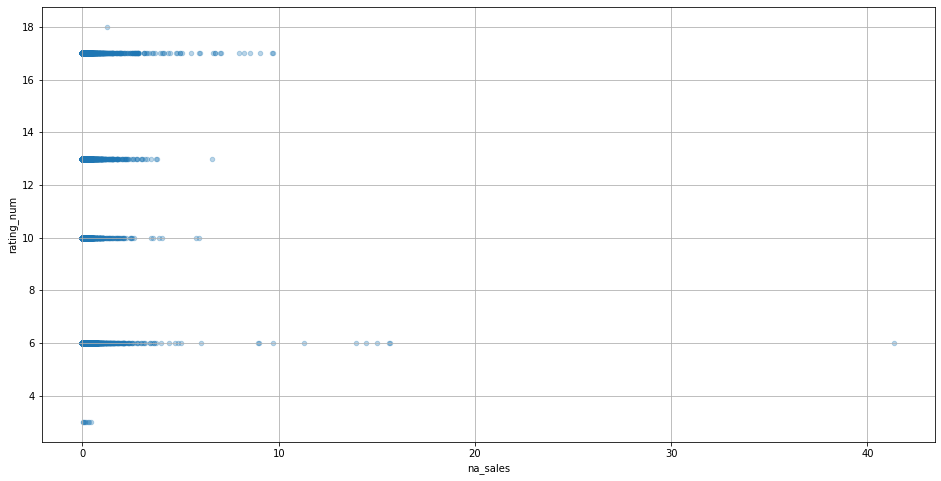

In [70]:
data_games_actual.plot(x='na_sales', y='rating_num', kind='scatter',grid=True, alpha=0.3,figsize=(16,8))
print('Коэффициент корреляции Пирсона для продаж в NA и ESRB-рейтингом',data_games_actual['na_sales'].corr(data_games_actual['rating_num']))

Коэффициент корреляции Пирсона для продаж в EU и ESRB-рейтингом 0.05016551128930358


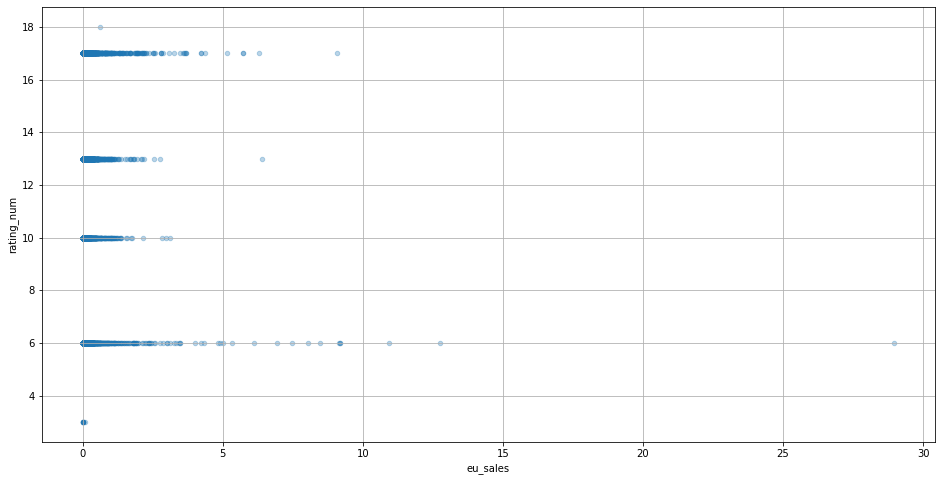

In [71]:
data_games_actual.plot(x='eu_sales', y='rating_num', kind='scatter',grid=True, alpha=0.3,figsize=(16,8))
print('Коэффициент корреляции Пирсона для продаж в EU и ESRB-рейтингом',data_games_actual['eu_sales'].corr(data_games_actual['rating_num']))

Коэффициент корреляции Пирсона для продаж в JP и ESRB-рейтингом -0.022337573680573333


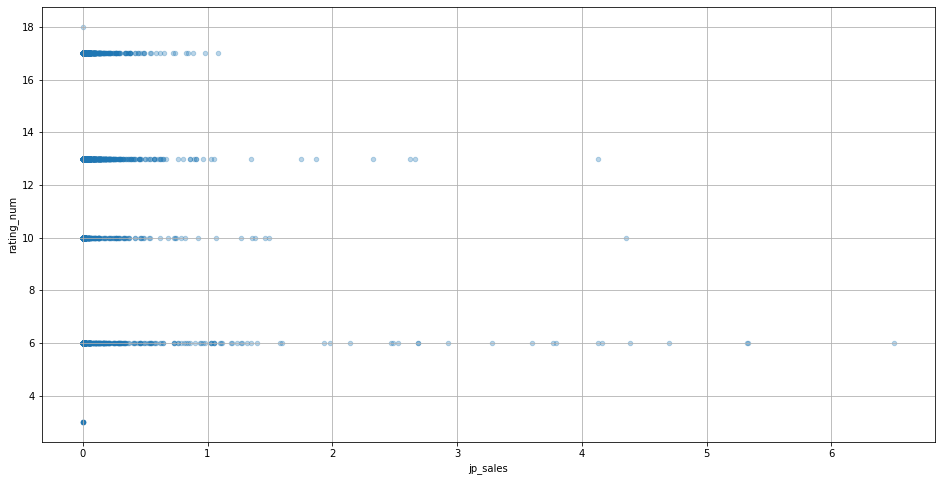

In [72]:
data_games_actual.plot(x='jp_sales', y='rating_num', kind='scatter',grid=True, alpha=0.3,figsize=(16,8))
print('Коэффициент корреляции Пирсона для продаж в JP и ESRB-рейтингом',data_games_actual['jp_sales'].corr(data_games_actual['rating_num']))

### Выводы по шагу 4
Определили самые популярные платформы (топ-5) в Северной Америке (NA), Европе (EU) и Японии (JP):
Топ-5 платформ в Северной Америке и Европе практически схожи, только в NA лидирует X360 (Microsoft) - 598.31 млн дол. продаж, а в EU - PS3 (Sony) - 327.53 млн дол., и в NA еще используют PS2, а в EU уже вовсю PS4. В Японии же свой лидер - это DS (Nintendo) - 171.35 млн дол. Платформы Wii, PS3 и DS присутствуют в топ-5 в каждом регионе.

Определили самые популярные жанры (топ-5) в Северной Америке, Европе и Японии:
Топы-5 для Северной Америки и Европы схожи, тройка лидеров это Action, Sports, Shooter. В Японии же предпочитают игры в жанре Role-Playing, а Shooter даже не попал в топ-5. Игры жанров Action, Misc и Sports присутствуют в топ-5 в каждом регионе.

Определили, влияет ли рейтинг ESRB на региональные продажи:
Коэффициент кореляции Пирсона для продаж в любом регионе (NA / EU / JP) и ESRB-рейтингом близок к нулю (0.039 / 0.05 / -0.022) и значит ESRB-рейтинг мало влияет на продажи. Но если посмотреть на диаграммы распределения, мы увидим, что в NA у игр с рейтингом M (17 и старше) больше шансов на успех, в EU это игры с рейтингами M и E (с 6 и старше), в JP больше приносят в первую очередь игры с рейтингами E, а во вторую - с рейтингами M и T (с 13 и старше). Игры для самых маленьких (с 3 лет) обречены на провал в любом регионе.

---

## Шаг 5. Проверяем гипотезы
Проверяем гипотезы:
* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
* Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные.

In [73]:
#Критический уровень статистической значимости
alpha = 0.05 #5%

In [74]:
###Гипотезы о cредних пользовательских рейтингах платформ Xbox One и PC
##Гипотеза о равенстве средних двух выборок
#Нулевая гипотеза: cредние пользовательские рейтинги платформ Xbox One и PC равны
#Альтернативная гипотеза: cредние пользовательские рейтинги платформ Xbox One и PC различаются
data_games_actual_xone = data_games_actual.query('platform == "XOne"')['user_score'].dropna()
data_games_actual_pc = data_games_actual.query('platform == "PC"')['user_score'].dropna()

disp_xone = round(np.var(data_games_actual_xone, ddof=1),2)
disp_pc = round(np.var(data_games_actual_pc, ddof=1),2)

print("Дисперсия XOne/PC:",disp_xone,"/",disp_pc)
if disp_xone == disp_pc:
    param_equal_var = True
else:
    param_equal_var = False

print("equal_var =",param_equal_var)
    
result_user_score = st.ttest_ind(
    data_games_actual_xone, 
    data_games_actual_pc,
    equal_var = param_equal_var)

print('p-value:',result_user_score.pvalue)

if (result_user_score.pvalue < alpha):
    print("Отвергаем нулевую гипотезу, что cредние пользовательские рейтинги платформ XOne и PC равны")
else:
    print("Не получилось отвергнуть нулевую гипотезу, что cредние пользовательские рейтинги платформ XOne и PC равны")
    
print("Средний пользовательский рейтинг XOne/PC:",round(data_games_actual_xone.mean(),2),"/",round(data_games_actual_pc.mean(),2))      

Дисперсия XOne/PC: 1.66 / 2.22
equal_var = False
p-value: 0.0009903290314045993
Отвергаем нулевую гипотезу, что cредние пользовательские рейтинги платформ XOne и PC равны
Средний пользовательский рейтинг XOne/PC: 6.48 / 6.93


In [75]:
###Гипотезы о cредних пользовательских рейтингах жанров Action и Sports
##Гипотеза о равенстве средних двух выборок
#Нулевая гипотеза: cредние пользовательские рейтинги жанров Action и Sports равны
#Альтернативная гипотеза: cредние пользовательские рейтинги жанров Action и Sports различаются
data_games_actual_action = data_games_actual.query('genre == "Action"')['user_score'].dropna()
data_games_actual_sports = data_games_actual.query('genre == "Sports"')['user_score'].dropna()

disp_action = round(np.var(data_games_actual_action, ddof=1),2)
disp_sports = round(np.var(data_games_actual_sports, ddof=1),2)

print("Дисперсия Action/Sports:",disp_action,"/",disp_sports)
if disp_action == disp_sports:
    param_equal_var = True
else:
    param_equal_var = False

print("equal_var =",param_equal_var)
    
result_user_score = st.ttest_ind(
    data_games_actual_action, 
    data_games_actual_sports,
    equal_var = param_equal_var)

print('p-value:',result_user_score.pvalue)

if (result_user_score.pvalue < alpha):
    print("Отвергаем нулевую гипотезу, что cредние пользовательские рейтинги жанров Action и Sports равны")
else:
    print("Не получилось отвергнуть нулевую гипотезу, что cредние пользовательские рейтинги жанров Action и Sports равны")
    
print("Средний пользовательский рейтинг Action/Sports:",round(data_games_actual_action.mean(),2),"/",round(data_games_actual_sports.mean(),2))    

Дисперсия Action/Sports: 1.84 / 2.55
equal_var = False
p-value: 1.0135126115073941e-07
Отвергаем нулевую гипотезу, что cредние пользовательские рейтинги жанров Action и Sports равны
Средний пользовательский рейтинг Action/Sports: 6.97 / 6.6


### Выводы по шагу 5

1. Проверили двустороннюю гипотезу, что cредние пользовательские рейтинги платформ XOne и PC равны.

    Нулевая гипотеза: cредние пользовательские рейтинги платформ XOne и PC равны.

    Альтернативная гипотеза: cредние пользовательские рейтинги платформ XOne и PC различаются.

    Уровень значимости (alpha) установили равным 5%

    Уровень значимости для статистики разности p-value получили равный 0 (0.0009903290314045993), в результате нулевую гипотезу отвергли - cредние пользовательские рейтинги платформ XOne и PC различаются.

Средний пользовательский рейтинг XOne/PC: 6.48 / 6.93



2. Проверили двустороннюю гипотезу, что cредние пользовательские рейтинги жанров Action и Sports равны.

    Нулевая гипотеза: cредние пользовательские рейтинги жанров Action и Sports равны.

    Альтернативная гипотеза: cредние пользовательские рейтинги жанров Action и Sports различаются.

    Уровень значимости (alpha) оставили тем же - 5%

    Уровень значимости для статистики разности p-value получили равный 0 (1.0135126115073941e-07), в результате нулевую гипотезу отвергли - cредние пользовательские рейтинги жанров Action и Sports различаются.

Средний пользовательский рейтинг Action/Sports: 6.97 / 6.6

---

## Шаг 6. Общий вывод

Интернет-магазину для планирования рекламных кампаний 2017 года следует оценивать потенциал игр по следующим характеристикам:

1. Жанры: 
Если мы говорим о международных рекламных кампаниях, то в первую очередь, это игры жанров Action, Shooter, Sports. Если о региональных - для Северной Америки и Европы тройка та же, для Японии - смотрим в первую очередь на игры жанра Role-Playing, о Shooter напрочь забываем. 


2. Платформы:
Стоит сделать ставку на перспективные платформы - XOne и PS4. Те платформы, что нынче еще популярны, уже сняты с производства, их жизненный цикл закончен и производители игр, думаю, в 2017 в первую очередь будут выпускать игры для новых платформ. При региональных рекламных кампаниях для пользователей Северной Америки лучшая платформа это XOne, для пользователей Европы - PS4, для Японии, где предпочитают Nintendo - Nintendo Switch, она как раз в октябре 2016 была анонсирована и в марте 2017 года должна поступить в продажу. В наш датасет она по понятным причинам не попала.


3. Оценки пользователей:
Стоит ориентироваться на оценку критиков выше 69 и оценку пользователей - выше 6.7.


4. ESRB-рейтинг:
Стоит присмотреться в первую очередь к играм с рейтингом M (с 17 лет и старше). Если же планируется рекламная кампания в Японии, то в приоритете будут игры с рейтингом E (с 6 лет и старше).